NAME: Jay Goyal

TASK: STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS

DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP
THE SPARKS FOUNDATION

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob # for extracting the sentiment out of the news headlines

import re
import os

# importing library for acquiring numerical data from yahoo finance
from pandas_datareader.data import  DataReader
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving india-news-headlines.csv to india-news-headlines (1).csv


In [ ]:
df = pd.read_csv('india-news-headlines.csv')
df.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [ ]:
df.shape

(3424067, 3)

In [ ]:
df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


changing the date format using to pd.to_datetime

In [ ]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format= '%Y%m%d')

In [ ]:
df

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [ ]:
df['headline_text'] = df.groupby(['publish_date']).transform(lambda news : ' '.join(news))

In [ ]:
df

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...
1,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...
2,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...
3,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...
4,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...
...,...,...,...
3424062,2020-12-31,city.jodhpur,astrology.horoscope city.vijayawada entertainm...
3424063,2020-12-31,city.udaipur,astrology.horoscope city.vijayawada entertainm...
3424064,2020-12-31,city.ajmer,astrology.horoscope city.vijayawada entertainm...
3424065,2020-12-31,removed,astrology.horoscope city.vijayawada entertainm...



Dropping duplicates and resetting the index

In [ ]:
df = df.drop_duplicates() 
df.reset_index(inplace=True,drop=True)

In [ ]:
print('The Textual Dataset\n\n')
print(df.shape,'\n\n\n\n')
df

The Textual Dataset


(466936, 3) 






,publish_date,headline_category,headline_text
0,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...
1,2001-01-02,entertainment.hindi.bollywood,unknown unknown unknown unknown unknown unknow...
2,2001-01-03,unknown,unknown unknown unknown unknown unknown unknow...
3,2001-01-03,entertainment.hindi.bollywood,unknown unknown unknown unknown unknown unknow...
4,2001-01-04,unknown,unknown unknown unknown unknown unknown unknow...
...,...,...,...
466931,2020-12-31,sports.cricket.india-in-australia,astrology.horoscope city.vijayawada entertainm...
466932,2020-12-31,city.amritsar,astrology.horoscope city.vijayawada entertainm...
466933,2020-12-31,city.jodhpur,astrology.horoscope city.vijayawada entertainm...
466934,2020-12-31,city.udaipur,astrology.horoscope city.vijayawada entertainm...



Extracting the polarity from the news headlines of the dataset

In [ ]:
polar= []
for i in range(df.shape[0]):

  polar.append(TextBlob(df['headline_text'][i]).sentiment.polarity)

Extracting the subjectivity from the news dataset

In [ ]:
subject= []

for j in range(df.shape[0]):

  subject.append(TextBlob(df['headline_text'][j]).sentiment.subjectivity)

In [ ]:
df['Polarity']= polar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Subjectivity'] = subject

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,publish_date,headline_category,headline_text,Polarity,Subjectivity
0,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...,-0.1,0.6
1,2001-01-02,entertainment.hindi.bollywood,unknown unknown unknown unknown unknown unknow...,-0.1,0.6
2,2001-01-03,unknown,unknown unknown unknown unknown unknown unknow...,-0.1,0.6
3,2001-01-03,entertainment.hindi.bollywood,unknown unknown unknown unknown unknown unknow...,-0.1,0.6
4,2001-01-04,unknown,unknown unknown unknown unknown unknown unknow...,-0.1,0.6
...,...,...,...,...,...
466931,2020-12-31,sports.cricket.india-in-australia,astrology.horoscope city.vijayawada entertainm...,0.0,0.0
466932,2020-12-31,city.amritsar,astrology.horoscope city.vijayawada entertainm...,0.0,0.0
466933,2020-12-31,city.jodhpur,astrology.horoscope city.vijayawada entertainm...,0.0,0.0
466934,2020-12-31,city.udaipur,astrology.horoscope city.vijayawada entertainm...,0.0,0.0


In [ ]:
len(df['headline_text'])

466936

Acquiring Sentiment from the news headlines

In [ ]:
sa = SentimentIntensityAnalyzer()

In [ ]:
def SentimentAnlyser(txt, label):

  list1= []
  a= df.shape[0]

  if label== 0:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['compound'])

  elif label== -1:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['neg'])

  elif label== 1:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['pos']) 

  else:

    for v in range(a):
      list1.append(sa.polarity_scores(txt[v])['neu'])

  return list1

In [ ]:
df['Compound']= SentimentAnlyser(df['headline_text'], label= 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Negative']= SentimentAnlyser(df['headline_text'],label= -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Positive']= SentimentAnlyser(df['headline_text'], label= 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Neutral']= SentimentAnlyser(df['headline_text'], label= 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving ^BSESN.csv to ^BSESN (1).csv


In [ ]:
pdf= pd.read_csv('^BSESN.csv')

In [ ]:
pdf.shape

(251, 7)

In [ ]:
pdf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-09,36950.199219,36950.199219,35109.179688,35634.949219,35634.949219,18800.0
1,2020-03-11,35468.898438,36021.511719,35261.921875,35697.398438,35697.398438,27900.0
2,2020-03-12,34472.500000,34472.500000,32493.099609,32778.140625,32778.140625,25200.0
3,2020-03-13,31214.130859,34769.480469,29388.970703,34103.480469,34103.480469,32600.0
4,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0
...,...,...,...,...,...,...,...
246,2021-03-03,50738.210938,51539.890625,50512.839844,51444.648438,51444.648438,15800.0
247,2021-03-04,50812.140625,51256.550781,50539.921875,50846.078125,50846.078125,21800.0
248,2021-03-05,50517.359375,50886.191406,50160.539063,50405.320313,50405.320313,19200.0
249,2021-03-08,50654.019531,50985.769531,50318.261719,50441.070313,50441.070313,14200.0


Closing Points of BSE SENSEX

Text(0.5, 1.0, 'BSE SENSEX CLOSING POINTS')

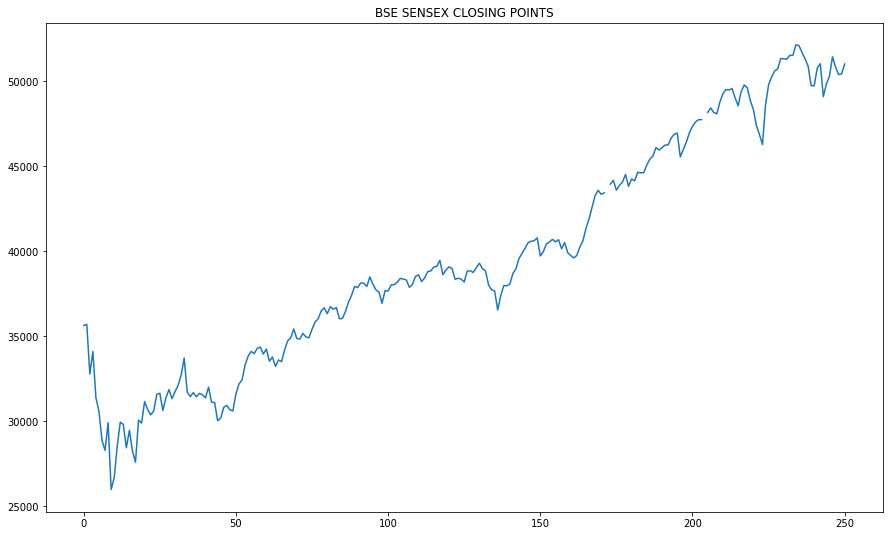

In [ ]:
plt.figure(figsize=(15,9))
pdf['Close'].plot();
plt.title('BSE SENSEX CLOSING POINTS')


Plotting Returns

In [ ]:
pdf['Returns']=  ( pdf['Close'] / pdf['Close'].shift(1) ) - 1

In [ ]:
pdf

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2020-03-09,36950.199219,36950.199219,35109.179688,35634.949219,35634.949219,18800.0,NaN
1,2020-03-11,35468.898438,36021.511719,35261.921875,35697.398438,35697.398438,27900.0,0.001752
2,2020-03-12,34472.500000,34472.500000,32493.099609,32778.140625,32778.140625,25200.0,-0.081778
3,2020-03-13,31214.130859,34769.480469,29388.970703,34103.480469,34103.480469,32600.0,0.040434
4,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0,-0.079564
...,...,...,...,...,...,...,...,...
246,2021-03-03,50738.210938,51539.890625,50512.839844,51444.648438,51444.648438,15800.0,0.022820
247,2021-03-04,50812.140625,51256.550781,50539.921875,50846.078125,50846.078125,21800.0,-0.011635
248,2021-03-05,50517.359375,50886.191406,50160.539063,50405.320313,50405.320313,19200.0,-0.008668
249,2021-03-08,50654.019531,50985.769531,50318.261719,50441.070313,50441.070313,14200.0,0.000709


Plotting Moving Average

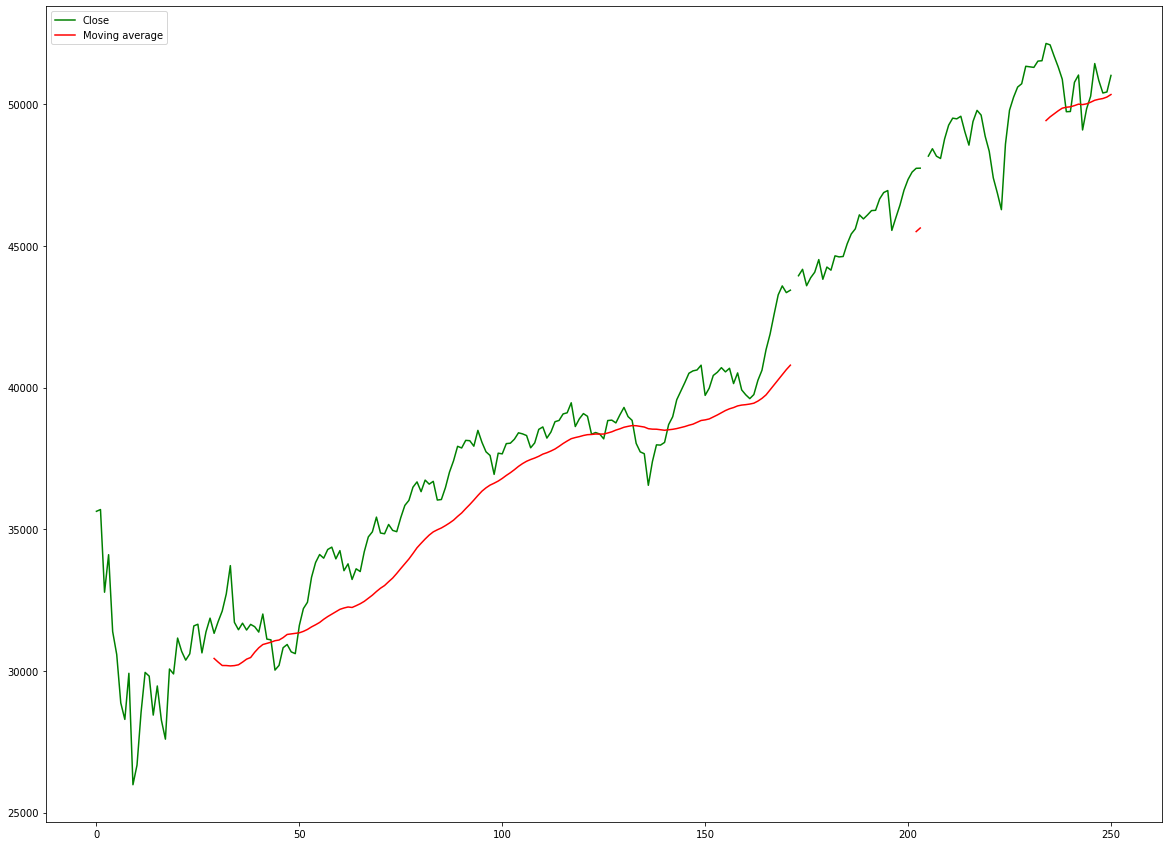

In [ ]:
mov_avg = pdf['Close'].rolling(window = 30).mean()

plt.figure(figsize=(20,15))
pdf['Close'].plot(color='g',label='Close')
mov_avg.plot(color = 'r',label='Moving average')
plt.legend()
plt.show();

Plotting Moving Standard Deviation

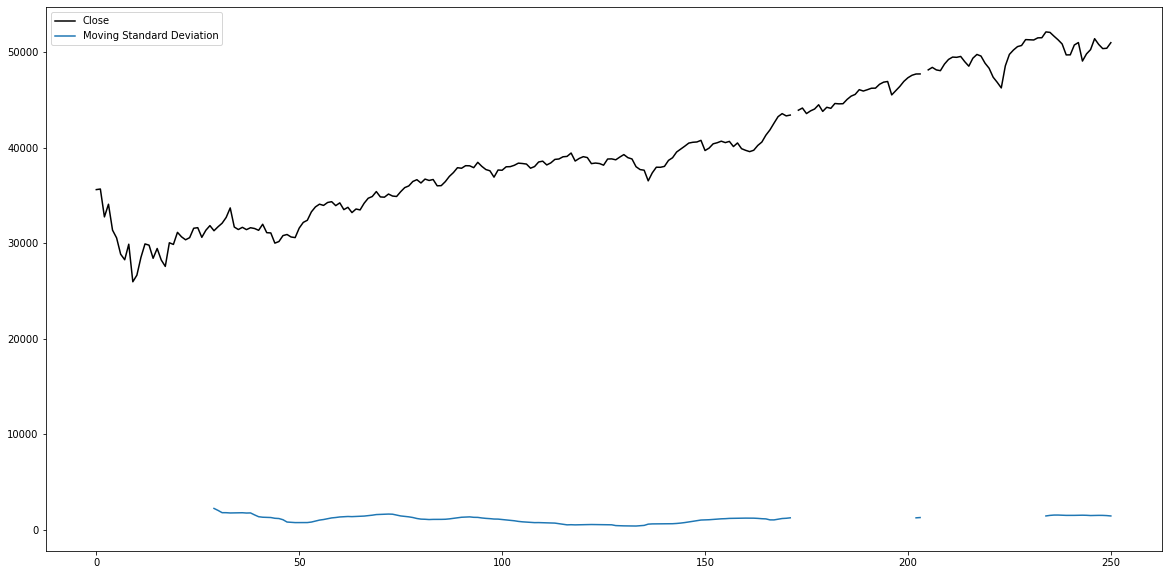

In [ ]:
std = pdf['Close'].rolling(window = 30).std()

plt.figure(figsize=(20,10))
pdf['Close'].plot(color='k',label='Close')
std.plot(label = 'Moving Standard Deviation')

plt.legend();

Concatinating the textual and numerical data frame

In [ ]:
complete_df= pd.concat([pdf, df], axis= 1, join= 'inner')

In [ ]:
complete_df

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,publish_date,headline_category,headline_text,Polarity,Subjectivity,Compound,Negative,Positive,Neutral
0,2020-03-09,36950.199219,36950.199219,35109.179688,35634.949219,35634.949219,18800.0,NaN,2001-01-02,unknown,unknown unknown unknown unknown unknown unknow...,-0.1,0.6,0.0,0.0,0.0,1.0
1,2020-03-11,35468.898438,36021.511719,35261.921875,35697.398438,35697.398438,27900.0,0.001752,2001-01-02,entertainment.hindi.bollywood,unknown unknown unknown unknown unknown unknow...,-0.1,0.6,0.0,0.0,0.0,1.0
2,2020-03-12,34472.500000,34472.500000,32493.099609,32778.140625,32778.140625,25200.0,-0.081778,2001-01-03,unknown,unknown unknown unknown unknown unknown unknow...,-0.1,0.6,0.0,0.0,0.0,1.0
3,2020-03-13,31214.130859,34769.480469,29388.970703,34103.480469,34103.480469,32600.0,0.040434,2001-01-03,entertainment.hindi.bollywood,unknown unknown unknown unknown unknown unknow...,-0.1,0.6,0.0,0.0,0.0,1.0
4,2020-03-16,33103.238281,33103.238281,31276.300781,31390.070313,31390.070313,18100.0,-0.079564,2001-01-04,unknown,unknown unknown unknown unknown unknown unknow...,-0.1,0.6,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2021-03-03,50738.210938,51539.890625,50512.839844,51444.648438,51444.648438,15800.0,0.022820,2001-06-23,business.international-business,india business.international-business unknown ...,-0.1,0.6,0.0,0.0,0.0,1.0
247,2021-03-04,50812.140625,51256.550781,50539.921875,50846.078125,50846.078125,21800.0,-0.011635,2001-06-23,unknown,india business.international-business unknown ...,-0.1,0.6,0.0,0.0,0.0,1.0
248,2021-03-05,50517.359375,50886.191406,50160.539063,50405.320313,50405.320313,19200.0,-0.008668,2001-06-23,business.india-business,india business.international-business unknown ...,-0.1,0.6,0.0,0.0,0.0,1.0
249,2021-03-08,50654.019531,50985.769531,50318.261719,50441.070313,50441.070313,14200.0,0.000709,2001-06-23,cricket,india business.international-business unknown ...,-0.1,0.6,0.0,0.0,0.0,1.0


In [ ]:
complete_df.shape

(251, 17)

Retainig only required features

In [ ]:
final_df = complete_df[['Close', 'Polarity', 'Negative', 'Neutral', 'Positive', 'Compound', 'Subjectivity']]

In [ ]:
final_df

,Close,Polarity,Negative,Neutral,Positive,Compound,Subjectivity
0,35634.949219,-0.1,0.0,1.0,0.0,0.0,0.6
1,35697.398438,-0.1,0.0,1.0,0.0,0.0,0.6
2,32778.140625,-0.1,0.0,1.0,0.0,0.0,0.6
3,34103.480469,-0.1,0.0,1.0,0.0,0.0,0.6
4,31390.070313,-0.1,0.0,1.0,0.0,0.0,0.6
...,...,...,...,...,...,...,...
246,51444.648438,-0.1,0.0,1.0,0.0,0.0,0.6
247,50846.078125,-0.1,0.0,1.0,0.0,0.0,0.6
248,50405.320313,-0.1,0.0,1.0,0.0,0.0,0.6
249,50441.070313,-0.1,0.0,1.0,0.0,0.0,0.6


In [ ]:
final_df.shape

(251, 7)


Standardising the Dataset

In [ ]:
sc= StandardScaler()

In [ ]:
DF = pd.DataFrame(sc.fit_transform(final_df))

DF.columns = final_df.columns
DF.index = final_df.index

DF.head()

,Close,Polarity,Negative,Neutral,Positive,Compound,Subjectivity
0,-0.591226,-0.2037,0.0,0.0,0.0,0.0,0.2037
1,-0.581935,-0.2037,0.0,0.0,0.0,0.0,0.2037
2,-1.016265,-0.2037,0.0,0.0,0.0,0.0,0.2037
3,-0.819080,-0.2037,0.0,0.0,0.0,0.0,0.2037
4,-1.222784,-0.2037,0.0,0.0,0.0,0.0,0.2037


In [ ]:
DF.isnull().sum()

Close           2
Polarity        0
Negative        0
Neutral         0
Positive        0
Compound        0
Subjectivity    0
dtype: int64

In [ ]:
DF.dropna(subset = ["Close"], inplace=True)

In [ ]:
DF.isnull().sum()

Close           0
Polarity        0
Negative        0
Neutral         0
Positive        0
Compound        0
Subjectivity    0
dtype: int64

In [ ]:
DF.shape

(249, 7)


Separating X and Y

In [ ]:
y= DF['Close']

x= DF.drop(columns= ['Close'])

In [ ]:
x.head()

,Polarity,Negative,Neutral,Positive,Compound,Subjectivity
0,-0.2037,0.0,0.0,0.0,0.0,0.2037
1,-0.2037,0.0,0.0,0.0,0.0,0.2037
2,-0.2037,0.0,0.0,0.0,0.0,0.2037
3,-0.2037,0.0,0.0,0.0,0.0,0.2037
4,-0.2037,0.0,0.0,0.0,0.0,0.2037


In [ ]:
y.head()

0   -0.591226
1   -0.581935
2   -1.016265
3   -0.819080
4   -1.222784
Name: Close, dtype: float64

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x, y)

y_rf = rf.predict(x)

In [ ]:
print('Mean Squared error: ',mean_squared_error(y_rf, y))

Mean Squared error:  0.99528883965143


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x, y)

y_dtr = dtr.predict(x)

print('Mean Squared error: ',mean_squared_error(y_dtr, y))

Mean Squared error:  0.9952764278679345


XGBoost Regressor

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor()

xgb.fit(x, y)

y_xgb = xgb.predict(x)

print('Mean Squared error: ',mean_squared_error(y_xgb, y))

[19:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared error:  0.995276431357425


Conclusion
Random Forest Regressor gave a mse = 0.0512
XGBoost Regressor gave a mse = 0.3352
Decision Tree Regressor gave a mse = 1.07e-7
This means Random Forest Regressor is the best model for regression analysis on this hybrid modle for BSE SENSEX points prediction as Decision Tree Regressor is highly overfitting and XGBoost is not providing an acceptable accuracy.